In [257]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [258]:
df = sns.load_dataset('titanic')
print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [260]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing values report:
age            177
embarked         2
deck           688
embark_town      2
dtype: int64


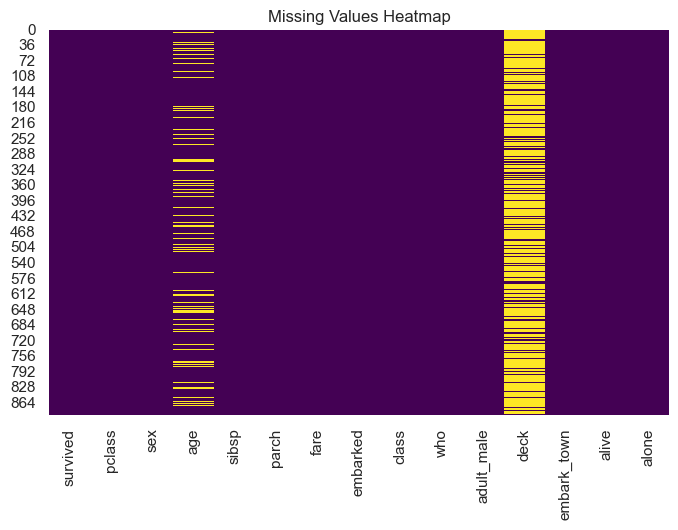

In [261]:
missing_report = df.isna().sum()
missing_report = missing_report[missing_report > 0]

print("Missing values report:")
print(missing_report)

# Visualizing missing values
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False) 
plt.title("Missing Values Heatmap")
plt.show()

In [262]:
df["age"].fillna(df["age"].median(), inplace=True)

df["embarked"].fillna(df["embarked"].mode()[0], inplace=True)

df["embark_town"].fillna(df["embark_town"].mode()[0], inplace=True)

df.drop(columns=["deck"], inplace=True)

print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


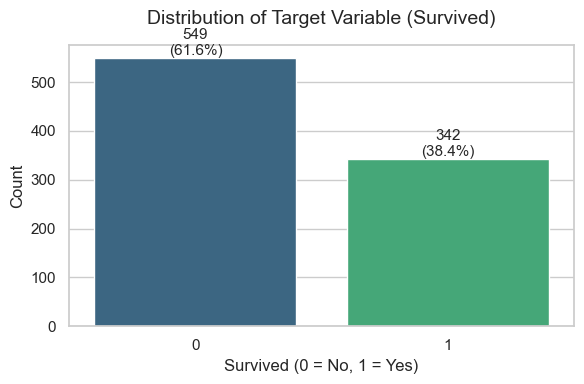

In [263]:
# Set Seaborn style
sns.set(style="whitegrid")

# Countplot for target variable
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x="survived", palette="viridis")

# Titles and labels
ax.set_title("Distribution of Target Variable (Survived)", fontsize=14, pad=15)
ax.set_xlabel("Survived (0 = No, 1 = Yes)", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Annotate counts and percentages on bars
total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percent = count / total * 100
    ax.annotate(f'{count}\n({percent:.1f}%)', 
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

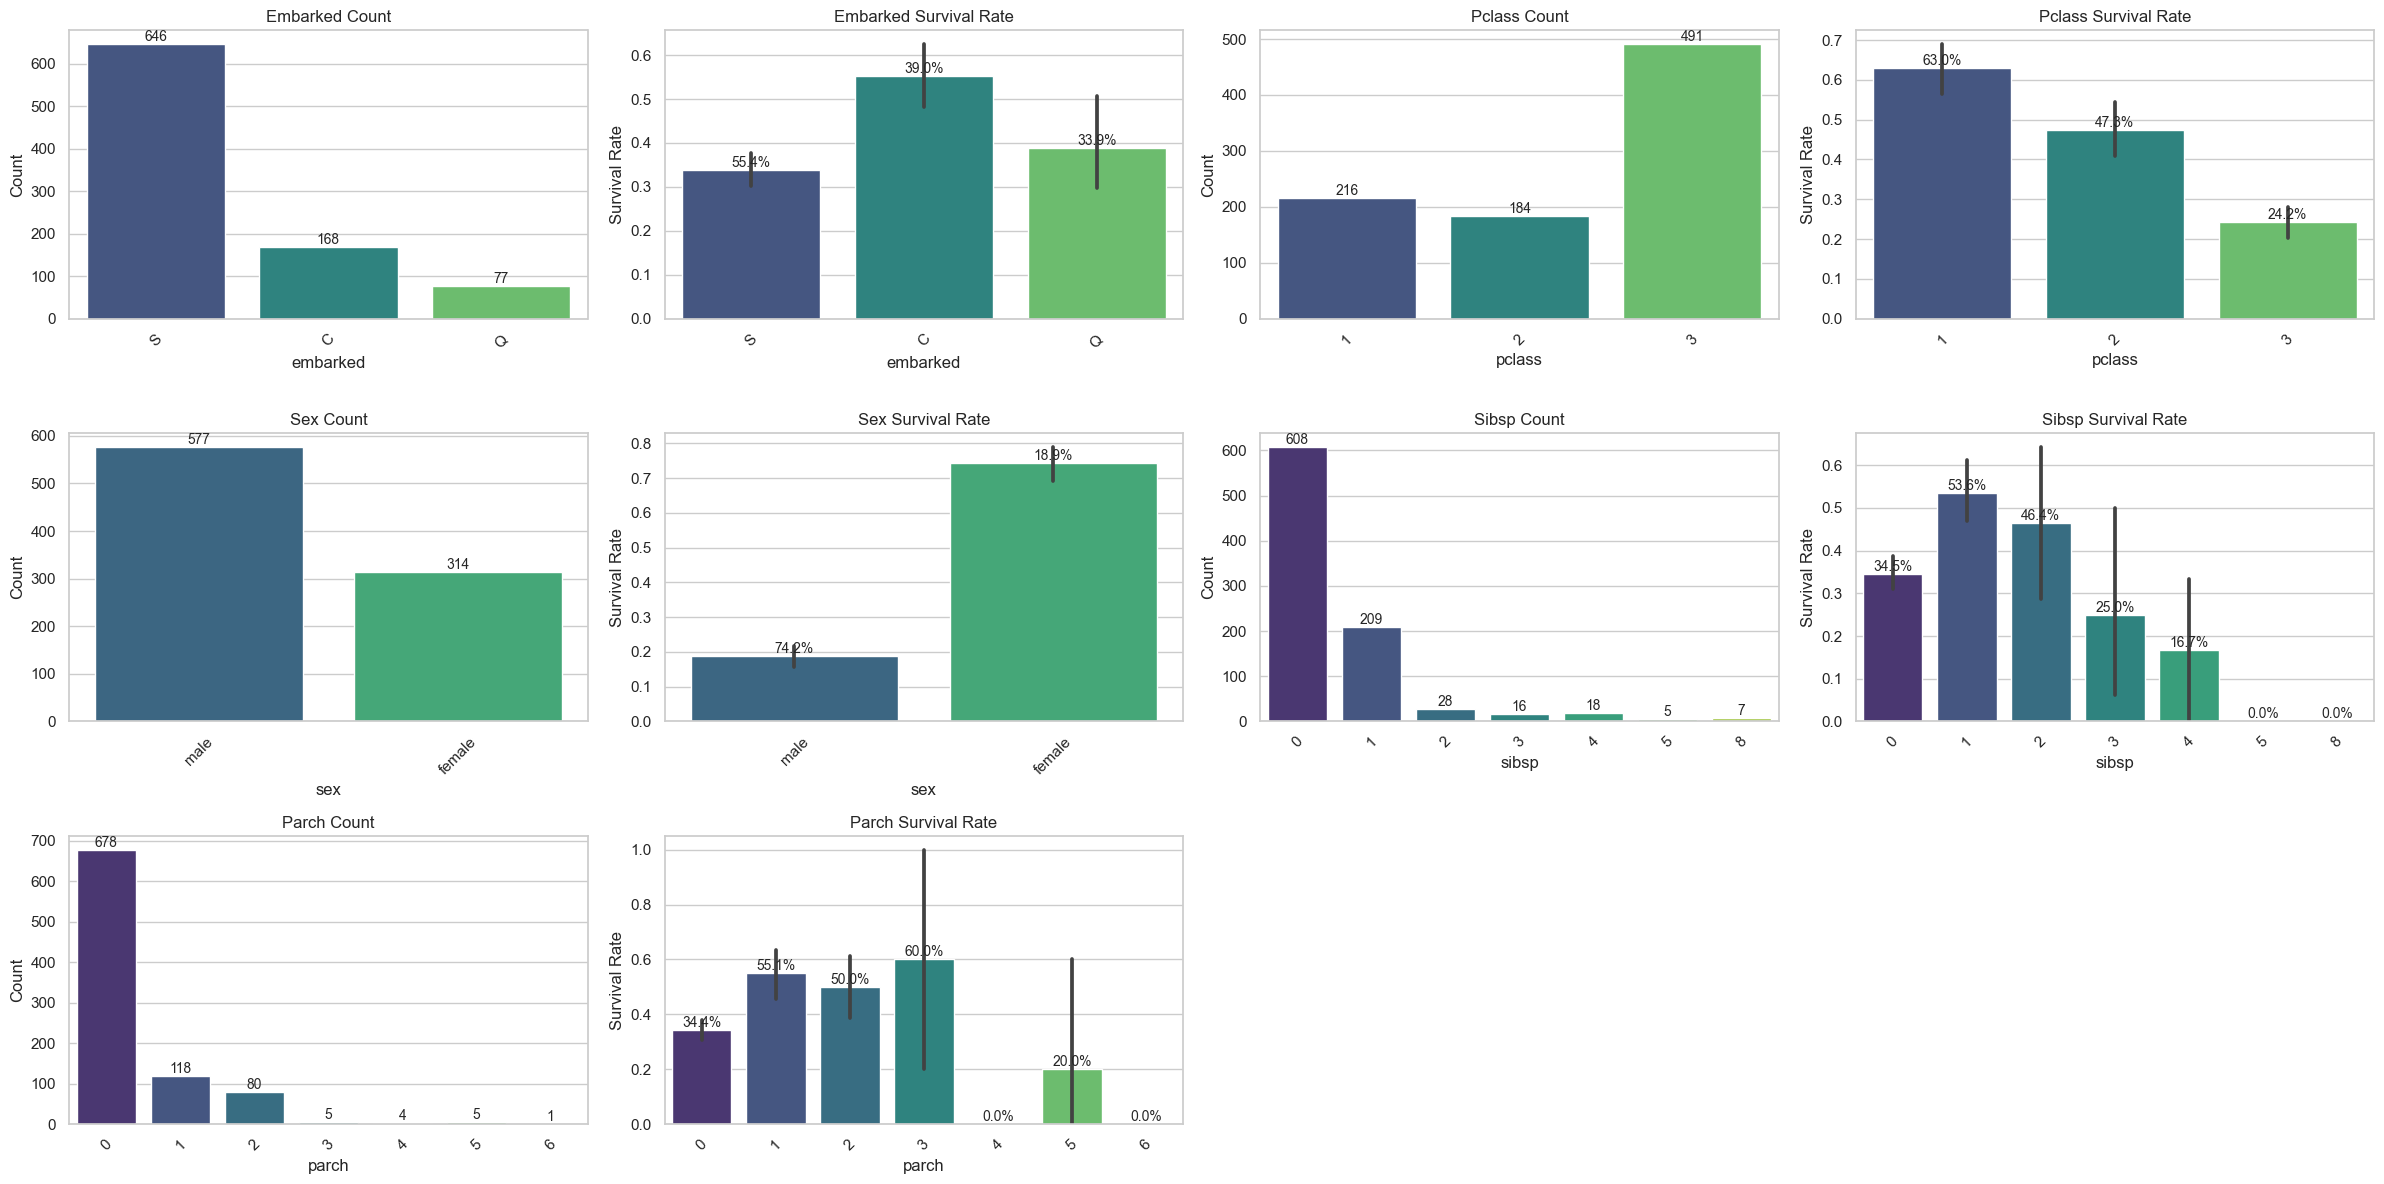

In [264]:
categorical_cols = ["embarked", "pclass", "sex", "sibsp", "parch"]

# -------------------------
# Max 2 features per row
# -------------------------
max_features_per_row = 2
n_rows = (len(categorical_cols) + max_features_per_row - 1) // max_features_per_row
fig, axes = plt.subplots(n_rows, max_features_per_row*2, figsize=(6*max_features_per_row*2, 4*n_rows))

# Make sure axes is always 2D array-like
if n_rows == 1:
    axes = [axes]

for idx, col in enumerate(categorical_cols):
    row = idx // max_features_per_row
    col_pos = idx % max_features_per_row * 2  # two plots per feature

    # --- Countplot (left) ---
    ax_count = axes[row][col_pos]
    sns.countplot(data=df, x=col, palette="viridis", ax=ax_count)
    ax_count.set_title(f"{col.capitalize()} Count")
    ax_count.set_xticklabels(ax_count.get_xticklabels(), rotation=45)
    ax_count.set_ylabel("Count")
    
    # Annotate counts
    for p in ax_count.patches:
        ax_count.annotate(f'{int(p.get_height())}', 
                          (p.get_x() + p.get_width()/2, p.get_height()),
                          ha='center', va='bottom', fontsize=10)

    # --- Survival Rate Barplot (right) ---
    ax_surv = axes[row][col_pos + 1]
    sns.barplot(data=df, x=col, y="survived", palette="viridis", ax=ax_surv)
    ax_surv.set_title(f"{col.capitalize()} Survival Rate")
    ax_surv.set_xticklabels(ax_surv.get_xticklabels(), rotation=45)
    ax_surv.set_ylabel("Survival Rate")
    
    # Annotate survival percentages
    survival_rate = df.groupby(col)["survived"].mean() * 100
    for p, val in zip(ax_surv.patches, survival_rate):
        ax_surv.annotate(f'{val:.1f}%', 
                         (p.get_x() + p.get_width()/2, p.get_height()),
                         ha='center', va='bottom', fontsize=10)

# Hide any empty subplots if features < max_features_per_row*rows
total_axes = n_rows * max_features_per_row * 2
for i in range(len(categorical_cols)*2, total_axes):
    row = i // (max_features_per_row*2)
    col_pos = i % (max_features_per_row*2)
    axes[row][col_pos].axis('off')

plt.tight_layout()
plt.show()

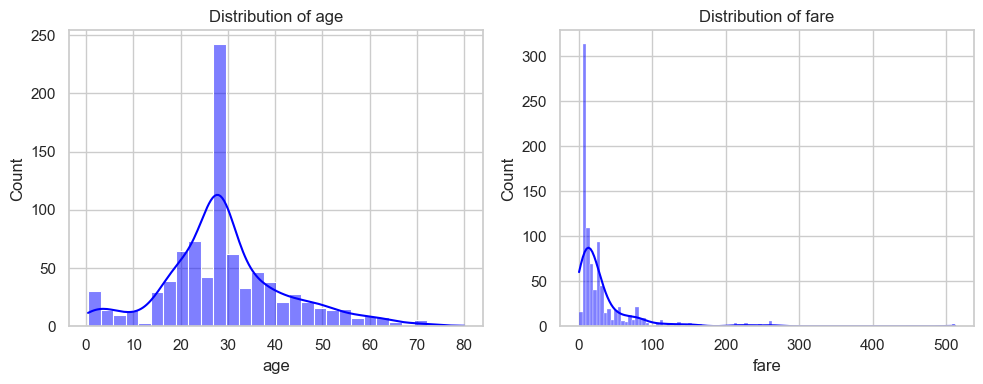

In [265]:
numerical_cols = ["age", "fare"]

# Create subplot grid
n_cols = 2
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols*5, n_rows*4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data=df, x=col, kde=True, color="blue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

## Heatmap

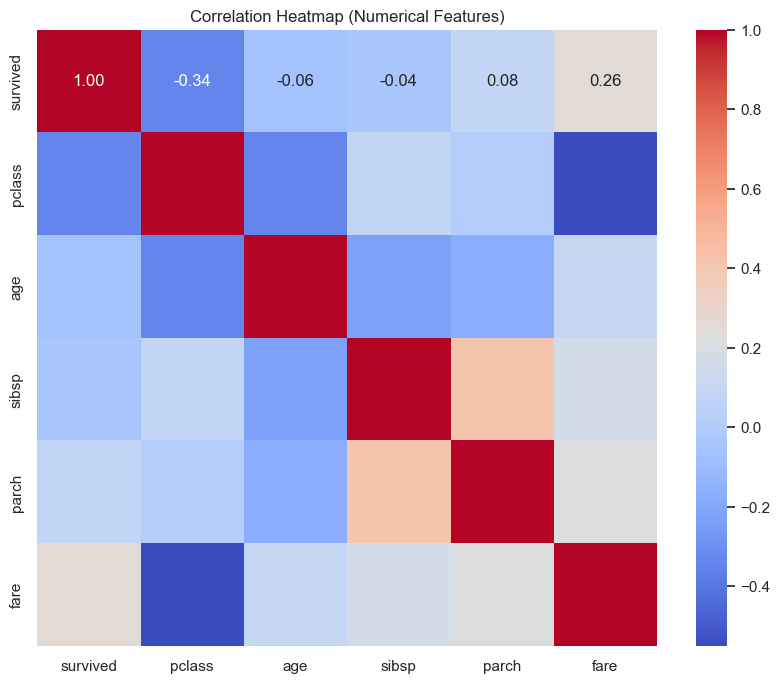

In [266]:
# Select only numerical columns
num_cols = df.select_dtypes(include=["int64", "float64"])

# Compute correlation matrix
corr_matrix = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [267]:
print("\nCorrelation with Survived:")
print(corr_matrix["survived"].sort_values(ascending=False))


Correlation with Survived:
survived    1.000000
fare        0.257307
parch       0.081629
sibsp      -0.035322
age        -0.064910
pclass     -0.338481
Name: survived, dtype: float64


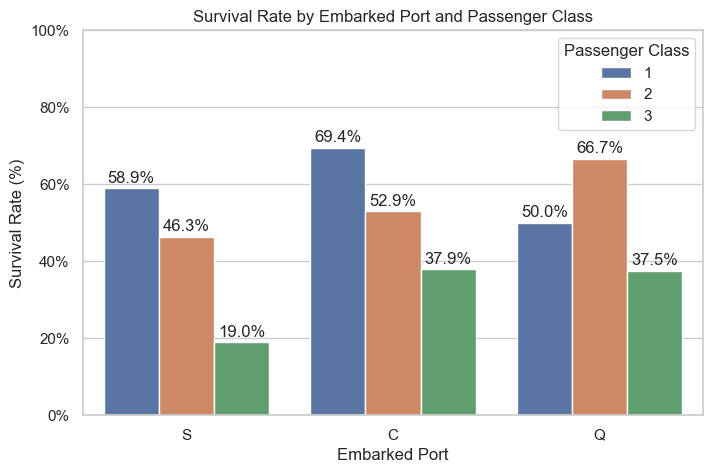

In [ ]:
plt.figure(figsize=(8,5))

ax = sns.barplot(
    data=df,
    x="embarked",
    y="survived",
    hue="pclass",
    errorbar=None
)

plt.title("Survival Rate by Embarked Port and Passenger Class")
plt.xlabel("Embarked Port")
plt.ylabel("Survival Rate (%)")

ax.set_ylim(0, 1)

ax.yaxis.set_major_formatter(lambda x, _: f'{int(x*100)}%')

for container in ax.containers:
    ax.bar_label(
        container,
        fmt=lambda x: f'{x*100:.1f}%',
        label_type='edge',
        padding=2
    )

plt.legend(title="Passenger Class")
plt.show()

In [269]:
# Survival Rate
rate = df.pivot_table(
    values="survived",
    index="embarked",
    columns="pclass",
    aggfunc="mean"
)

rate = (rate * 100).round(1)

print("\nSurvival Rate (%)\n by Embarkation Port & Class")
print("_" * 30)
print(rate)


# Passenger Count
count = df.pivot_table(
    values="survived",
    index="embarked",
    columns="pclass",
    aggfunc="count"
)

print("\nPassenger Count\n by Embarkation Port & Class")
print("_" * 30)
print(count)


Survival Rate (%)
 by Embarkation Port & Class
______________________________
pclass       1     2     3
embarked                  
C         69.4  52.9  37.9
Q         50.0  66.7  37.5
S         58.9  46.3  19.0

Passenger Count
 by Embarkation Port & Class
______________________________
pclass      1    2    3
embarked               
C          85   17   66
Q           2    3   72
S         129  164  353
